# House Price Prediction

## Introduction

**In the dynamic real estate landscape of Bengaluru, accurately predicting house prices is pivotal for both buyers and sellers in making informed decisions. This project aims to leverage advanced machine learning techniques to develop a robust Bengaluru House Price Prediction model. By analyzing diverse features such as location, square footage, and amenities, the model endeavors to provide accurate and insightful predictions, empowering stakeholders with valuable insights into the ever-evolving property market in Bengaluru.**

### Import necessary modules

In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Import dataset

In [145]:
df = pd.read_csv('Bengaluru_House_Data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [146]:
df.shape

(13320, 9)

The dataset consists of 13320 rows and 9 columns

In [147]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [148]:
for i in df.columns:
    print(f'{i} : {df[i].nunique()}')

area_type : 4
availability : 81
location : 1305
size : 31
society : 2688
total_sqft : 2117
bath : 19
balcony : 4
price : 1994


In [149]:
for i in df.columns:
    print(f'{i} : {df[i].unique()}')

area_type : ['Super built-up  Area' 'Plot  Area' 'Built-up  Area' 'Carpet  Area']
availability : ['19-Dec' 'Ready To Move' '18-May' '18-Feb' '18-Nov' '20-Dec' '17-Oct'
 '21-Dec' '19-Sep' '20-Sep' '18-Mar' '20-Feb' '18-Apr' '20-Aug' '18-Oct'
 '19-Mar' '17-Sep' '18-Dec' '17-Aug' '19-Apr' '18-Jun' '22-Dec' '22-Jan'
 '18-Aug' '19-Jan' '17-Jul' '18-Jul' '21-Jun' '20-May' '19-Aug' '18-Sep'
 '17-May' '17-Jun' '21-May' '18-Jan' '20-Mar' '17-Dec' '16-Mar' '19-Jun'
 '22-Jun' '19-Jul' '21-Feb' 'Immediate Possession' '19-May' '17-Nov'
 '20-Oct' '20-Jun' '19-Feb' '21-Oct' '21-Jan' '17-Mar' '17-Apr' '22-May'
 '19-Oct' '21-Jul' '21-Nov' '21-Mar' '16-Dec' '22-Mar' '20-Jan' '21-Sep'
 '21-Aug' '14-Nov' '19-Nov' '15-Nov' '16-Jul' '15-Jun' '17-Feb' '20-Nov'
 '20-Jul' '16-Sep' '15-Oct' '15-Dec' '16-Oct' '22-Nov' '15-Aug' '17-Jan'
 '16-Nov' '20-Apr' '16-Jan' '14-Jul']
location : ['Electronic City Phase II' 'Chikka Tirupathi' 'Uttarahalli' ...
 '12th cross srinivas nagar banshankari 3rd stage' 'Havanur exten

### Data Cleaning

In [150]:
# Drop less relevant features in dataset
df1 = df.drop(['area_type', 'availability', 'society', 'balcony'], axis = 'columns')
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [151]:
# Checking null values in dataset
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

The columns location, size and bath have null values.

In [152]:
# Drop the null values in dataset
df2 = df1.dropna()

In [153]:
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [162]:
df2.shape

(13246, 5)

In [163]:
# Add new column
df2['bhk'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))
df2.head()

<ipython-input-163-ce16972e523f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['bhk'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [164]:
# Find column total_sqft unique values
df2.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

Here, the datatype of column total_sqft is object. So we need to convert that to float.

In [165]:
# Convert datatype of column total_sqft to float
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True    

In [166]:
df2[~df2['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


Here we have range values(2100 - 2850) and also values like 34.46Sq. Meter and 4125Perch. Thus to deal with range values, we can take the average of min and max values and as in case of other values let's drop them.

In [167]:
def range_avg(x):
    tokens=x.split('-')
    if len(tokens)==2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [168]:
df4=df2.copy()
df4['total_sqft'] = df4['total_sqft'].apply(range_avg)
df4=df4[df4['total_sqft'].notnull()]
df4.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [169]:
df4.shape

(13200, 6)

So now the dataset consist of 13200 rows and 6 columns

### Feature Engineering

In [170]:
# Add a new feature price_per_sqft
df4['price_per_sqft'] = df4['price']*100000/df4['total_sqft']
df4.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


### Dimensionality Reduction

In [171]:
# No: of unique values
df4.location.nunique()

1298

In [172]:
# Display the count of each unique value 
df4['location'] = df4['location'].apply(lambda x: x.strip())
location_count = df4['location'].value_counts(ascending=False)
location_count

Whitefield            533
Sarjapur  Road        392
Electronic City       304
Kanakpura Road        264
Thanisandra           235
                     ... 
KAMAKIYA                1
PNS Layout              1
Sahyadri Layout         1
Harohalli               1
West of Chord Road      1
Name: location, Length: 1287, dtype: int64

In [173]:
len(location_count[location_count>10])

240

In [174]:
len(location_count[location_count<=10])

1047

Now, Locations with less than 10 data points can be categorized as 'other.' Thus number of categories can be reduced.

In [175]:
df4['location'] = df4['location'].apply(lambda x: 'other' if x in location_count[location_count<=10] else x)

In [176]:
df4.location.nunique()

241

Now, the number of categories of location have been reduced to 241.

### Outlier Removal

Typically, a minimum threshold of 300 square feet per bedroom is considered standard. For instance, a 2 BHK apartment should have a minimum area of 600 square feet. If there are instances where, for example, a 2 BHK apartment has only 400 square feet, it appears anomalous and may be treated as an outlier. To address this, we will remove such outliers by enforcing the minimum threshold of 300 square feet per bedroom.

In [177]:
df4[df4.total_sqft/df4.bhk<300].head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000
78,Kaval Byrasandra,2 BHK,460.0,1.0,22.0,2,4782.608696
89,Rajaji Nagar,6 Bedroom,710.0,6.0,160.0,6,22535.211268
119,Hennur Road,2 Bedroom,276.0,3.0,23.0,2,8333.333333
129,Vishwapriya Layout,7 Bedroom,950.0,7.0,115.0,7,12105.263158
149,other,6 Bedroom,1034.0,5.0,185.0,6,17891.682785


Certainly, the instances highlighted, such as a 6 BHK apartment with a total area of 1020 square feet and an 8 BHK apartment with 600 square feet, deviate significantly from the expected size norms based on the number of bedrooms. As such, it is advisable to eliminate these outliers from the dataset.

In [178]:
df4.shape

(13200, 7)

In [179]:
df5 = df4[~(df4.total_sqft/df4.bhk<300)]

In [180]:
df5.shape

(12456, 7)

Now, Let's Remove outliers based on mean and standard deviation.

In [181]:
df5.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

Here, we observe a substantial range in property prices, with the minimum price per square foot being 267 Rs/sqft and the maximum reaching 176,470 Rs/sqft. This significant variation underscores the presence of outliers in the dataset. To address this, we need to eliminate outliers on per location basis using the mean and standard deviation.

In [182]:
def remove_outliers(df):
    df_out= pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        sd=np.std(subdf.price_per_sqft)
        new_subdf=subdf[(subdf.price_per_sqft>(m-sd)) & (subdf.price_per_sqft<=(m+sd))]
        df_out=pd.concat([df_out, new_subdf],ignore_index=True)
    return df_out

df6=remove_outliers(df5)

In [183]:
df6.shape

(10242, 7)

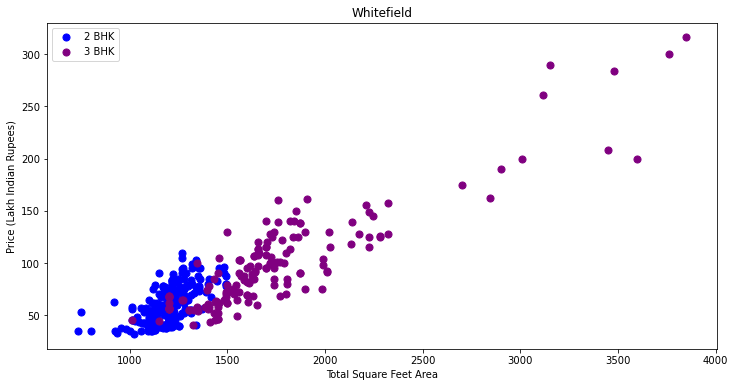

In [184]:
# Scatter plot to compare 2 BHK and 3 BHK apartment price
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    plt.figure(figsize=(12, 6))
    plt.scatter(bhk2.total_sqft, bhk2.price, color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price, color='purple',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df6, "Whitefield")

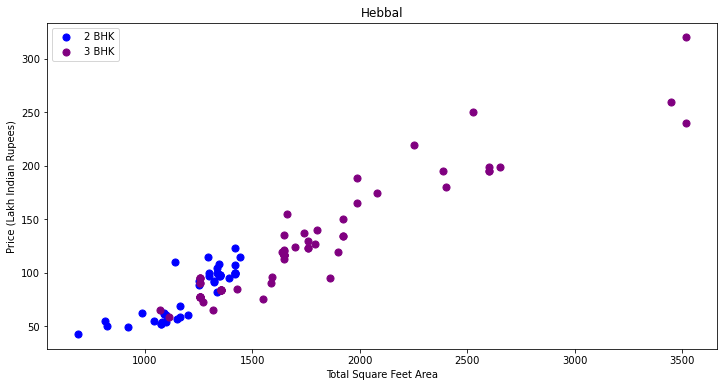

In [185]:
plot_scatter_chart(df6, "Hebbal")

From these scatter plots, we can see that some 3 BHK apartments Cost less that 2 BHK apartment, that too in the same locality. Thus we have to remove such outliers also.

In [186]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        global bhk_stats
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'sd': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

df7 = remove_bhk_outliers(df6)

In [187]:
df7.shape

(7317, 7)

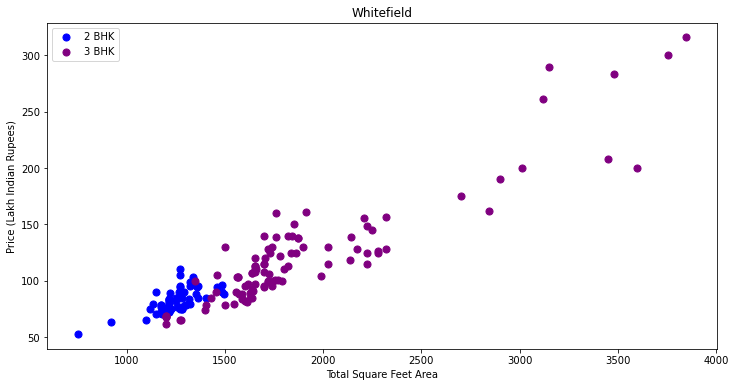

In [188]:
plot_scatter_chart(df7, "Whitefield")

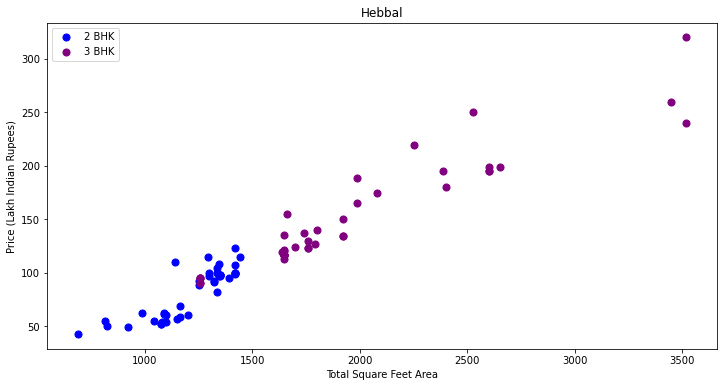

In [189]:
plot_scatter_chart(df7, "Hebbal")

Here, from these scatter plots we can see that most of the outliers have been removed.

In [190]:
# Count unique bathroom values
df7.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

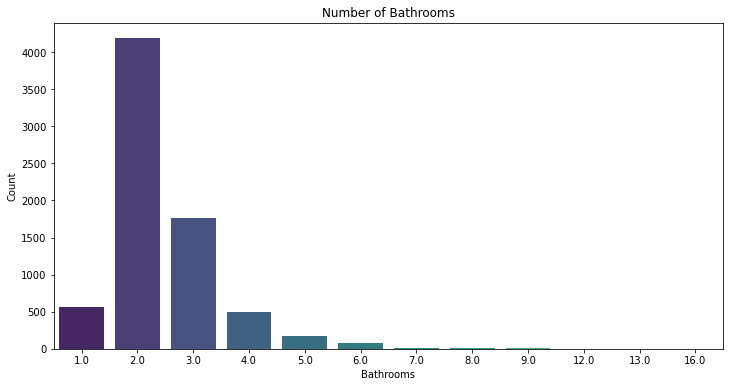

In [191]:
plt.figure(figsize=(12, 6))
sns.countplot(x='bath', data=df7, palette='viridis')
plt.title('Number of Bathrooms')
plt.xlabel('Bathrooms')
plt.ylabel('Count')
plt.show()

In [192]:
df7[df7['bath']>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8483,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8572,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9306,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9637,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


Having two or more bathrooms than the number of bedrooms in a home is uncommon. So we need to remove them.

In [193]:
df8 = df7[df7.bath<df7.bhk+2]

In [194]:
df8.shape

(7239, 7)

In [195]:
# Drop less relevant features from dataset
df9 = df8.drop(['size','price_per_sqft'],axis='columns')
df9.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


### One Hot Encoding

In [196]:
df10 = pd.get_dummies(df9, columns=['location'])
df10.head()

,total_sqft,bath,price,bhk,location_1st Block Jayanagar,location_1st Phase JP Nagar,location_2nd Phase Judicial Layout,location_2nd Stage Nagarbhavi,location_5th Block Hbr Layout,location_5th Phase JP Nagar,...,location_Vishveshwarya Layout,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur,location_other
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [197]:
# Replace the prefix "location_" from the columns
df10.columns = df10.columns.str.replace('location_','')
df10.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [198]:
df10.shape

(7239, 245)

### Build Machine Learning Model

In [199]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV

In [200]:
# Split Training and Testing data
X = df10.drop(['price'], axis='columns')
y=df10.price
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

### Linear Regression

In [201]:
parameter = {
    'normalize': [True, False]
}

lr=LinearRegression() # object creation
cv = GridSearchCV(lr, parameter, cv=5)
cv.fit(X_train,y_train) 

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'normalize': [True, False]})

In [202]:
best_model=cv.best_estimator_ # best_estimator_ is a  parameter that finds the best model
best_model

LinearRegression(normalize=True)

In [203]:
lr=LinearRegression(normalize=True)
lr.fit(X_train, y_train)
lr_pred=lr.predict(X_test)
lr_pred

array([123.671875,  79.078125,  76.859375, ...,  58.4375  ,  99.421875,
       135.75    ])

### Decision Tree

In [204]:
parameter = {
    'criterion' : ['mse','friedman_mse'],
    'splitter': ['best','random']
}
dt=DecisionTreeRegressor()
cv = GridSearchCV(dt, parameter, cv=5)
cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'friedman_mse'],
                         'splitter': ['best', 'random']})

In [205]:
best_model=cv.best_estimator_ # best_estimator_ is a  parameter that finds the best model
best_model

DecisionTreeRegressor(criterion='friedman_mse', splitter='random')

In [206]:
dt=DecisionTreeRegressor(criterion='friedman_mse', splitter='random')
dt.fit(X_train, y_train)
dt_pred=dt.predict(X_test)
dt_pred

array([104.25,  52.  ,  52.  , ...,  69.5 ,  71.05, 133.  ])

### Random Forest

In [207]:
rf=RandomForestRegressor()
rf.fit(X_train, y_train)
rf_pred=rf.predict(X_test)
rf_pred

array([102.90536491,  81.6346375 ,  53.66895833, ...,  65.89564333,
        71.02096667, 122.05861111])

### AdaBoost

In [208]:
ada=AdaBoostRegressor()
ada.fit(X_train, y_train)
ada_pred=ada.predict(X_test)
ada_pred

array([115.91339958,  62.62914683,  62.62914683, ...,  62.62914683,
        68.76946922, 134.83374277])

### Gradient Boosting

In [209]:
gb=GradientBoostingRegressor()
gb.fit(X_train, y_train)
gb_pred=gb.predict(X_test)
gb_pred

array([112.71490913,  55.17429061,  57.11199445, ...,  52.53339411,
        89.40689441, 133.94519756])

### Evaluation

In [210]:
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'AdaBoost', 'Gradient Boosting']
predictions = [lr_pred, dt_pred, rf_pred, ada_pred, gb_pred]

for model_name, pred in zip(models, predictions):
    mse = mean_squared_error(y_test, pred)
    msa=mean_absolute_error(y_test,pred)
    r2 = r2_score(y_test, pred)
    print(f"{model_name} - MSE: {mse}, MSA: {msa}, R2 Score: {r2}")

Linear Regression - MSE: 711.1378094321909, MSA: 16.155977209944755, R2 Score: 0.862897526617258
Decision Tree - MSE: 1277.6954661951481, MSA: 17.218069443083774, R2 Score: 0.7536691112160957
Random Forest - MSE: 920.5720785872305, MSA: 14.949841017867312, R2 Score: 0.8225200415061942
AdaBoost - MSE: 1723.3951056574244, MSA: 27.372977726344978, R2 Score: 0.6677412894274257
Gradient Boosting - MSE: 784.5156425464711, MSA: 17.66994367926181, R2 Score: 0.8487507856086953


**Upon comprehensive evaluation of multiple metrics, including MSE, MAE, and R2 Score, Linear Regression demonstrate better performance, achieving an impressive R2 score of 0.86. This signifies a robust model fit and enhanced predictive accuracy. Following closely are the Gradient Boosting and Random Forest models, both demonstrating strong predictive capabilities with R2 scores of 0.85 and 0.82, respectively. These models, characterized by reduced mean squared errors, signify their proficiency in capturing underlying patterns in the dataset. While the Decision Tree and AdaBoost models exhibit slightly lower R2 scores, they still showcase respectable predictive performance.**

In [212]:
# K Fold cross validation to measure accuracy of LinearRegression model
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=5)
cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.84419402, 0.85497609, 0.85668584, 0.81251786, 0.82202831])

The cross-validated R2 scores for the Linear Regression model consistently range from approximately 0.81 to 0.86 across different train-test splits, indicating robust predictive performance. 